In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import functions as fc



df = fc.load_parquet("/ceph/aavocone/Datasets/3_large.parquet")

df.drop(["class","cladd"], axis=1, inplace=True)
print(df.columns)


Index(['B_sig_K_dr', 'B_sig_K_dz', 'B_sig_CleoConeCS_3_ROE',
       'thrustAxisCosTheta', 'aplanarity', 'sphericity',
       'harmonicMomentThrust0', 'harmonicMomentThrust1',
       'harmonicMomentThrust2', 'harmonicMomentThrust3',
       'harmonicMomentThrust4', 'foxWolframR1', 'foxWolframR2', 'foxWolframR3',
       'foxWolframR4', 'signal', 'class', 'cladd'],
      dtype='object')


!!!!!!!! Remove the class and cladd column !!!!!!!
Index(['B_sig_K_dr', 'B_sig_K_dz', 'B_sig_CleoConeCS_3_ROE',
       'thrustAxisCosTheta', 'aplanarity', 'sphericity',
       'harmonicMomentThrust0', 'harmonicMomentThrust1',
       'harmonicMomentThrust2', 'harmonicMomentThrust3',
       'harmonicMomentThrust4', 'foxWolframR1', 'foxWolframR2', 'foxWolframR3',
       'foxWolframR4', 'signal'],
      dtype='object')


# large sample


## load model and get prediction

In [3]:

#test train split
X = df[df.columns[:-1]]    #
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)

model50 = xgb.XGBClassifier()
model50.load_model("/work/aavocone/models/model50.txt")
y50_train = model50.predict_proba(xtrain)[:,1]
y50 = model50.predict_proba(xtest)[:,1]

model100 = xgb.XGBClassifier()
model100.load_model("/work/aavocone/models/model100.txt")
y100_train = model100.predict_proba(xtrain)[:,1]
y100 = model100.predict_proba(xtest)[:,1]

model200 = xgb.XGBClassifier()
model200.load_model("/work/aavocone/models/model200.txt")
y200_train = model200.predict_proba(xtrain)[:,1]
y200 = model200.predict_proba(xtest)[:,1]

model500 = xgb.XGBClassifier()
model500.load_model("/work/aavocone/models/model500.txt")
y500_train = model500.predict_proba(xtrain)[:,1]
y500 = model500.predict_proba(xtest)[:,1]





## get roc and auc values

In [4]:
#n=50
auc50 =roc_auc_score(ytest,y50)
fp50,tp50, thresh50 = roc_curve(ytest, y50)
#n=100
auc100 = roc_auc_score(ytest,y100)
fp100,tp100, thresh100 = roc_curve(ytest, y100)
#n=200
auc200 =roc_auc_score(ytest,y200)
fp200,tp200, thresh200 = roc_curve(ytest, y200)
#n=500
auc500 =roc_auc_score(ytest,y500)
fp500,tp500, thresh500 = roc_curve(ytest, y500)

## histogram

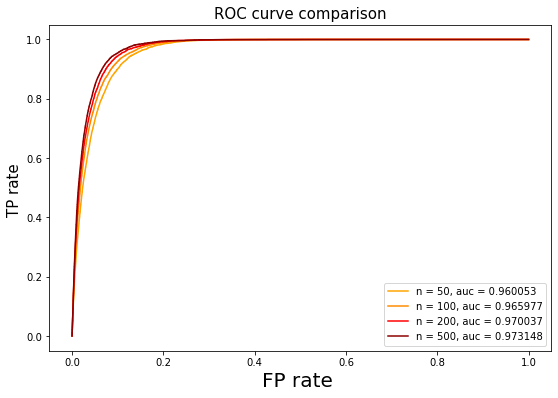

In [ ]:


plt.figure(figsize=(9,6))
plt.plot(fp50, tp50, label = f"n = 50, auc = {auc50:3f}", color ="orange")
plt.plot(fp100, tp100, label = f"n = 100, auc = {auc100:3f}", color ="darkorange")
plt.plot(fp200, tp200, label = f"n = 200, auc = {auc200:3f}", color ="red")
plt.plot(fp500, tp500, label = f"n = 500, auc = {auc500:3f}", color ="darkred")
plt.title(f"ROC curve comparison", fontsize = 15)
plt.xlabel("FP rate ", fontsize = 20)
plt.ylabel("TP rate ", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week4/large_ROC_comparison.jpeg")
plt.show()


In [ ]:

bins =np.linspace(0,1,21)
fc.stacked_hist(df,y500,ytest, binning=bins)

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


NameError: name 'np' is not defined